# EXPLORATORY DATA ANALYSIS NOTEBOOK

## Importing libraries

In [3]:
import numpy as np     
import pandas as pd
import seaborn as sns             
import matplotlib.pyplot as plt 


In [5]:
df = pd.read_csv('Life Expectancy Data.csv') # reading in the necessary dataset

## Checking the Data

**Essential checks were performed to ensure data quality:**

- **Data Types**: Only **Country** and **Region** are non-numerical columns.  
- **Null Values**: The dataset contains no null values, ensuring completeness.  
- **Country Count**: There are 179 unique countries in the data, slightly fewer than the 183 countries claimed by WHO, indicating potential omissions or mismatches.

In [38]:
# Getting a sense of the variables available in the data set
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [9]:
# Initial dataframe review for comprehensive understanding.
df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

**Country** and **Region** would both require Numerical Transformations.

In [10]:
# Examining variable data types to identify required transformations.

df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [12]:
# Checking for null values in the dataset

df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

No Null values present in code

In [14]:
# checking count of countries and regions
print(f'Number of Unique Countries is: {df.Country.nunique()}')
print(f'Number of Different Regions is: {df.Region.nunique()}')

Number of Unique Countries is: 179
Number of Different Regions is: 9


**We notice 4 of the 183 WHO member countries are missing**

In [16]:
# Checking unique years present in data

sorted(df.Year.unique())

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [17]:
# Examining the characteristics and behavior of the dependent variables.

df.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

In [18]:
# Investigating potential correlations between variables.

df.corr(numeric_only=True)

Year  Infant_deaths  Under_five_deaths  \
Year                         1.000000e+00      -0.172402          -0.176393   
Infant_deaths               -1.724017e-01       1.000000           0.985651   
Under_five_deaths           -1.763926e-01       0.985651           1.000000   
Adult_mortality             -1.586596e-01       0.794661           0.802361   
Alcohol_consumption         -6.105222e-04      -0.454526          -0.409367   
Hepatitis_B                  1.768241e-01      -0.512562          -0.507427   
Measles                      8.594472e-02      -0.526282          -0.512972   
BMI                          1.614225e-01      -0.661988          -0.665255   
Polio                        1.398584e-01      -0.740790          -0.742983   
Diphtheria                   1.451429e-01      -0.721875          -0.725355   
Incidents_HIV               -8.174257e-02       0.349458           0.369618   
GDP_per_capita               4.099817e-02      -0.512286          -0.469682   
Population_mln               1.515762e-02       0.007622          -0.005234   
Thinness_ten_nineteen_years -4.490053e-02       0.491192           0.466978   
Thinness_five_nine_years    -4.803775e-02       0.477639           0.450756   
Schooling                    1.505394e-01      -0.788513          -0.773196   
Economy_status_Developed    -5.026601e-15      -0.475866          -0.427134   
Economy_status_Developing    4.975598e-15       0.475866           0.427134   
Life_expectancy              1.743589e-01      -0.920032          -0.920419   

                             Adult_mortality  Alcohol_consumption  \
Year                               -0.158660            -0.000611   
Infant_deaths                       0.794661            -0.454526   
Under_five_deaths                   0.802361            -0.409367   
Adult_mortality                     1.000000            -0.244794   
Alcohol_consumption                -0.244794             1.000000   
Hepatitis_B                        -0.344882             0.168436   
Measles                            -0.416153             0.318603   
BMI                                -0.522866             0.284032   
Polio                              -0.524226             0.301926   
Diphtheria                         -0.513803             0.299016   
Incidents_HIV                       0.699119            -0.034118   
GDP_per_capita                     -0.510121             0.443966   
Population_mln                     -0.053848            -0.039119   
Thinness_ten_nineteen_years         0.382140            -0.446366   
Thinness_five_nine_years            0.379792            -0.433030   
Schooling                          -0.581035             0.615728   
Economy_status_Developed           -0.429375             0.670366   
Economy_status_Developing           0.429375            -0.670366   
Life_expectancy                    -0.945360             0.399159   

                             Hepatitis_B   Measles       BMI     Polio  \
Year                            0.176824  0.085945  0.161422  0.139858   
Infant_deaths                  -0.512562 -0.526282 -0.661988 -0.740790   
Under_five_deaths              -0.507427 -0.512972 -0.665255 -0.742983   
Adult_mortality                -0.344882 -0.416153 -0.522866 -0.524226   
Alcohol_consumption             0.168436  0.318603  0.284032  0.301926   
Hepatitis_B                     1.000000  0.429168  0.345421  0.724345   
Measles                         0.429168  1.000000  0.416321  0.514096   
BMI                             0.345421  0.416321  1.000000  0.457206   
Polio                           0.724345  0.514096  0.457206  1.000000   
Diphtheria                      0.761780  0.494059  0.426501  0.953178   
Incidents_HIV                  -0.075782 -0.150580 -0.161142 -0.147952   
GDP_per_capita                  0.159375  0.313724  0.336180  0.313786   
Population_mln                 -0.082396 -0.098222 -0.166482 -0.033486   
Thinness_ten_nineteen_years    -0.20845

## Visualizing the Data

A heatmap was used to visualize the correlations between different features.  
**The feature "Life Expectancy" was excluded to avoid influencing insights into the testing data.**

#### Key Insights:
* **High Correlation**: The correlation between **Under_five_deaths** and **Infant_deaths** is 0.99, as **Infant_deaths** constitute a significant portion of **Under_five_deaths**.
* **Vaccination Impact**: Immunization rates for **Polio** and **Diphtheria** are negatively correlated with **Under_five_deaths** and **Infant_deaths**, indicating that higher vaccination rates are associated with lower child mortality. 

In [43]:
# and Visually... Correlation Heatmap

plt.figure(figsize=(20, 10))
corr_matrix = df(df.drop(columns=['Life_expectancy'])).select_dtypes(include='number').corr()  # Automatically filters numeric columns
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='viridis',
    vmin=-1,
    vmax=1,
    fmt='.2f',
    mask=np.triu(corr_matrix)
)
plt.show()

TypeError: 'DataFrame' object is not callable

<Figure size 2000x1000 with 0 Axes>

## Distribution through the years

> This visualization confirms that the number of entries across all years is consistent.

> An equal distribution of entries ensures that the dataset is balanced over time, preventing any year from disproportionately influencing the analysis or model predictions.

> This balance helps maintain the temporal fairness of insights and supports more robust modeling.

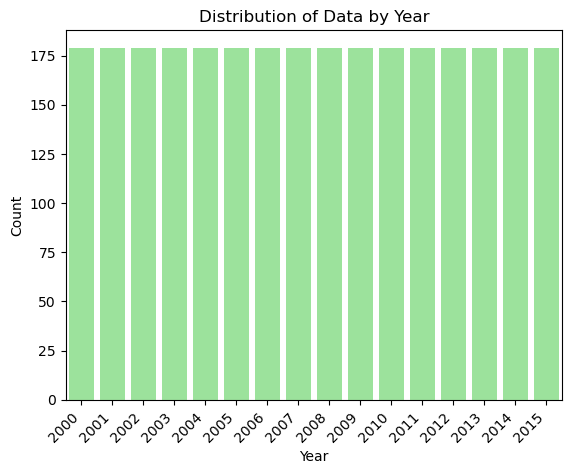

In [20]:
# Investigate data points for each year of observation.

sns.countplot(x='Year', data=df, color='lightgreen') 
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Data by Year')
plt.xticks(rotation=45, ha='right')
plt.show()

An equal number of entries for each year will ensure that the model is not biased towards any specific year, mitigating potential temporal biases in the analysis.

## Distribution by Regions 

This visualization aims to display the distribution of data entries across various regions,

#### Key Insights:
1. **Regional Breakdown and Inconsistencies:**
* **Asia**, **Europe**, and **Americas** are divided into sub-regions for finer granularity, while **Africa** remains undivided.
* Africa, being the second-largest continent, has significant internal diversity in life expectancy. Treating it as one region can skew predictions, as conditions vary greatly between, for example, **North Africa** and **Sub-Saharan Africa**.

2. **Increased Bias**: 
* Using broad regions can introduce **bias**. Africa, for instance, includes both high and low life expectancy countries, leading to overgeneralized predictions. Broad categories fail to capture regional differences in healthcare and economic conditions.
3. **High Variability within Regions**:
* Life expectancy varies widely within regions. For example, **Japan** has one of the highest life expectancies in **Asia**, while **Afghanistan** has one of the lowest. This variability makes using a single regional coefficient problematic.


This visualization highlights the importance of considering **regional breakdowns** carefully when analyzing life expectancy or similar outcomes. While using regions can be a useful approach to group similar countries, it must be done thoughtfully to avoid **skewing predictions** or introducing **bias**. The diversity within regions, especially large and diverse continents like Africa and Asia, calls for more granular categorization to better capture the varying life expectancy trends and other relevant factors. Without this level of granularity, we risk drawing **oversimplified conclusions** that fail to represent the full spectrum of data.

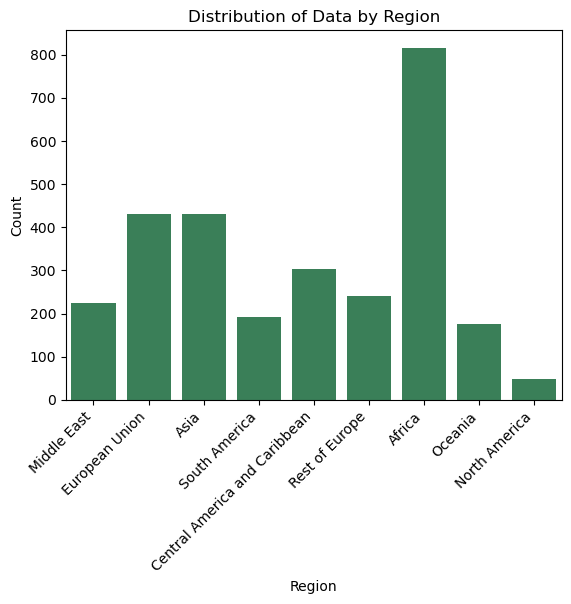

In [19]:
sns.countplot(x='Region', data=df, color = 'seagreen') 
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Data by Region')
plt.xticks(rotation=45, ha='right')
plt.show()

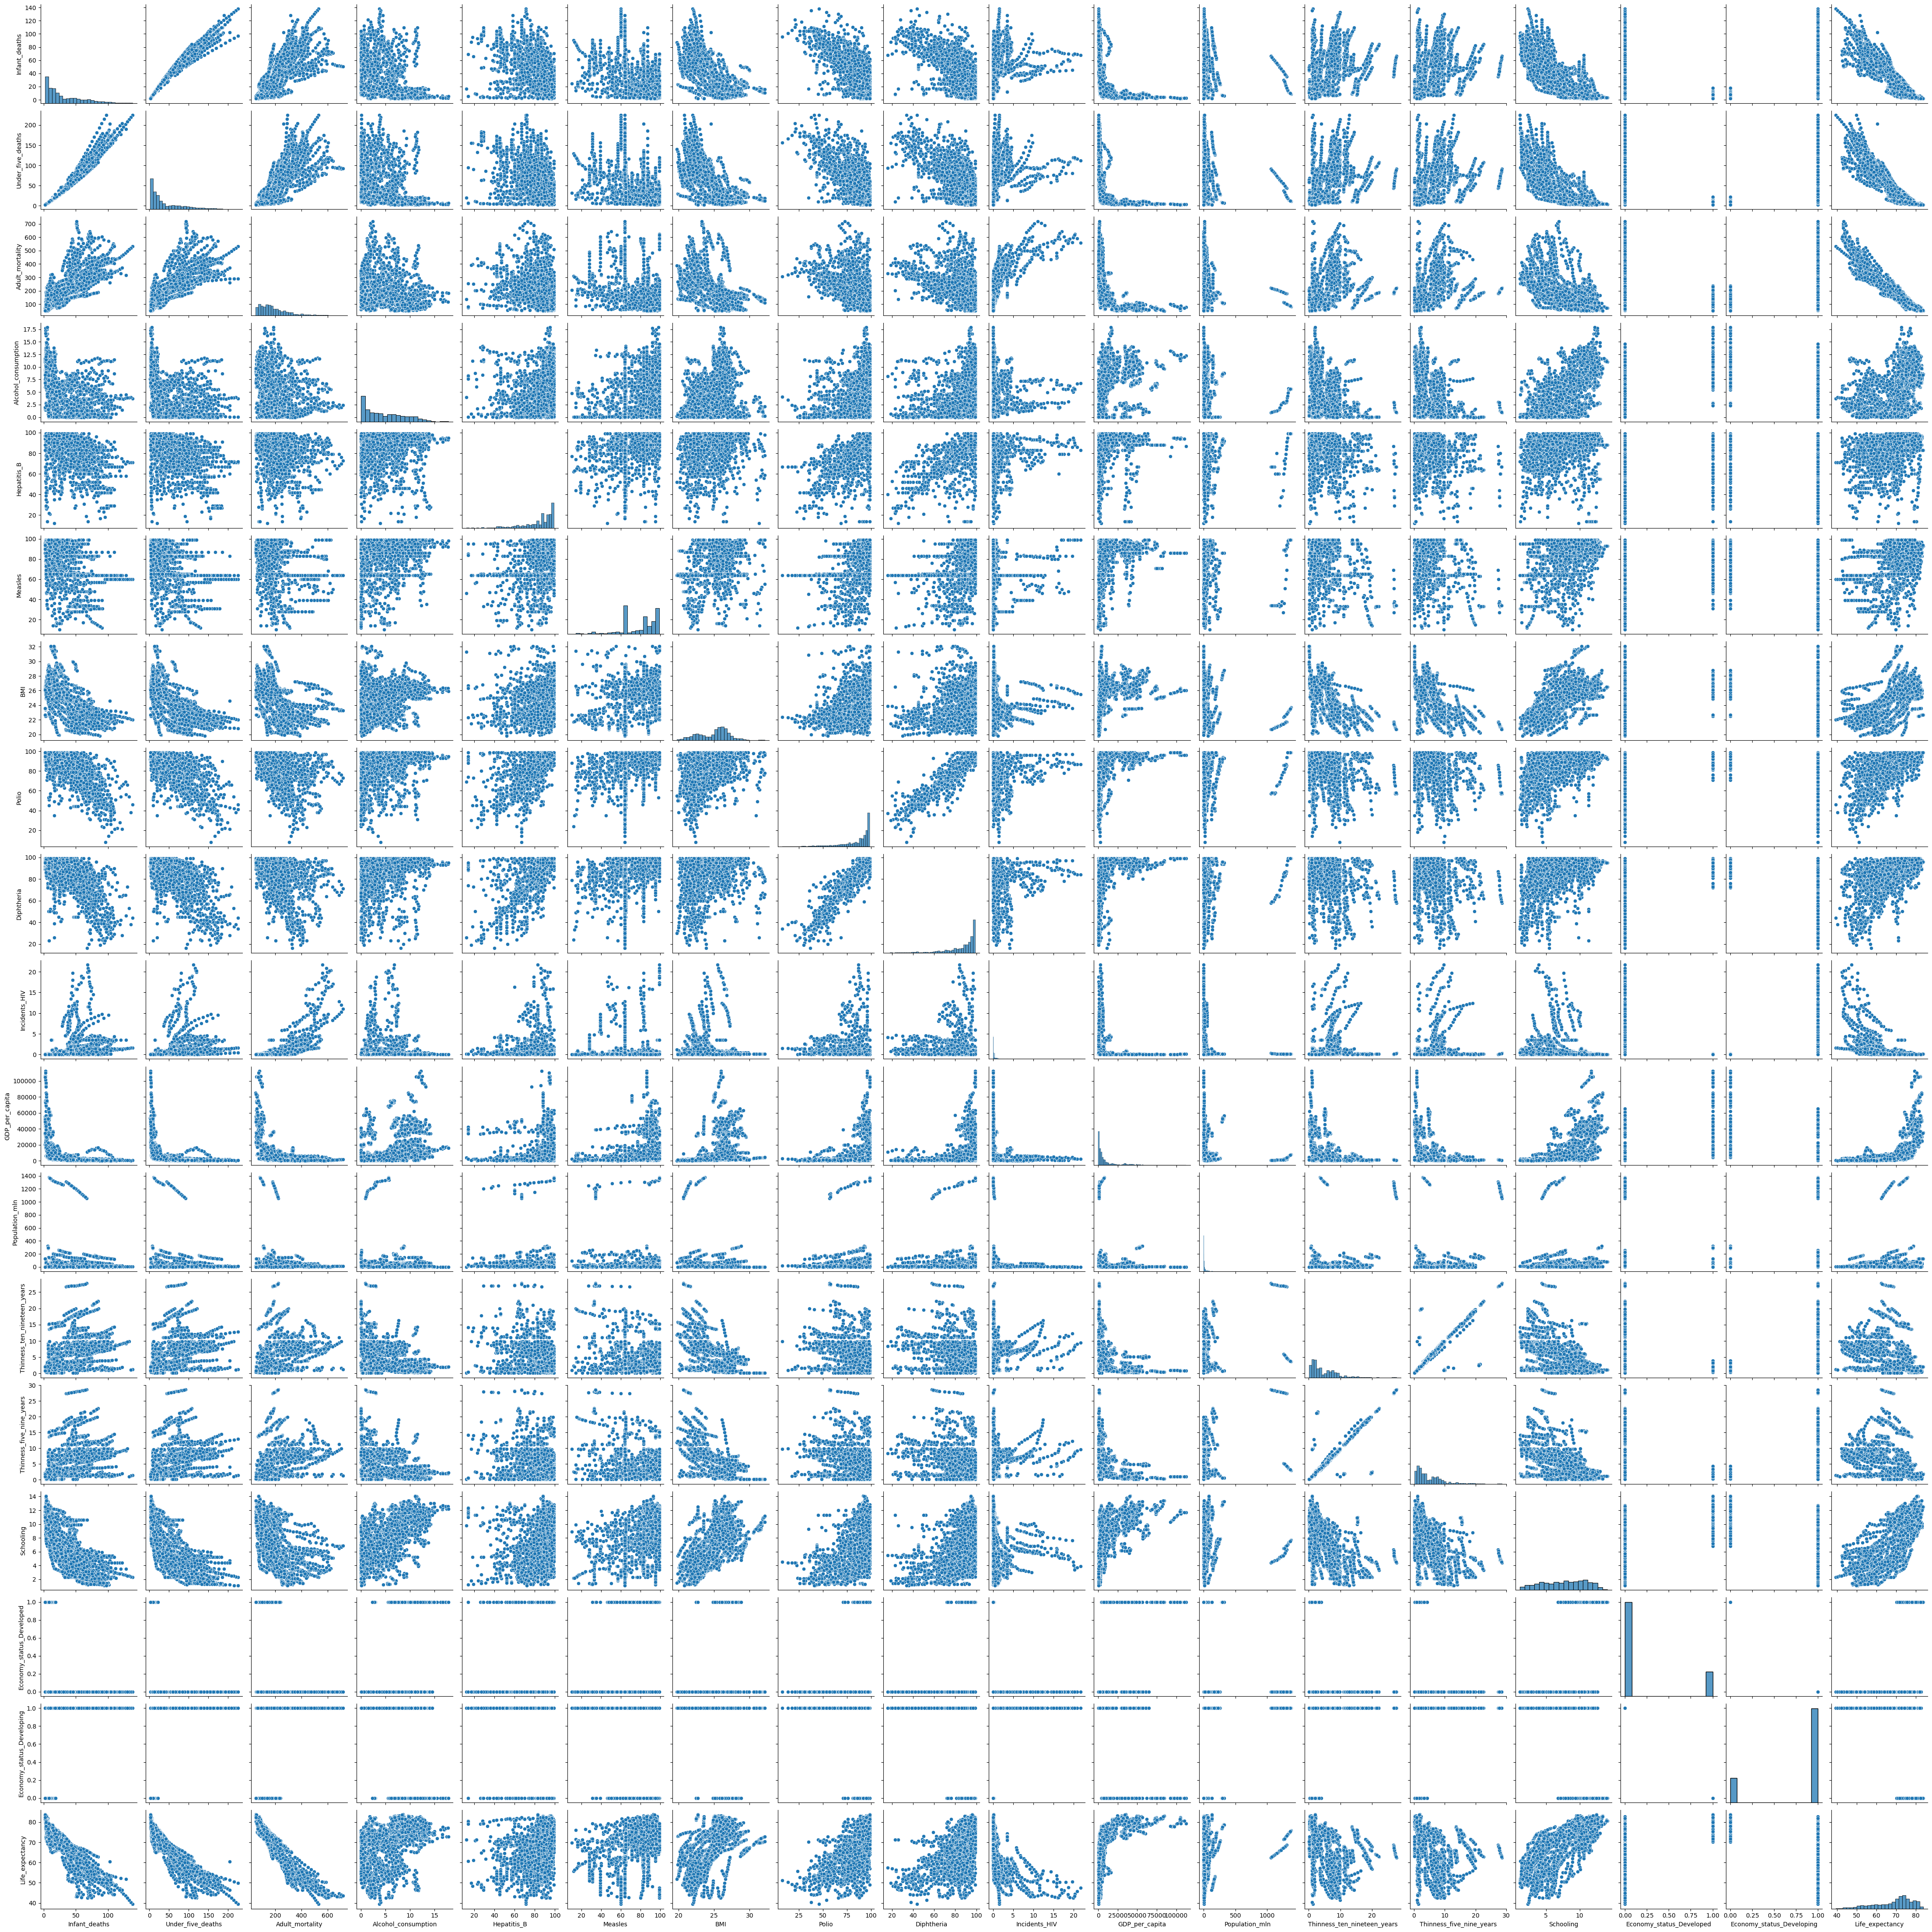

In [40]:
sns.pairplot(df[[ 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy']])
plt.show()